In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import confusion_matrix

# modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [7]:
#  input data

df=pd.read_csv('weather_classification_data[1].csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [70]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [72]:
# visualization

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64


<Axes: xlabel='Cloud Cover', ylabel='count'>

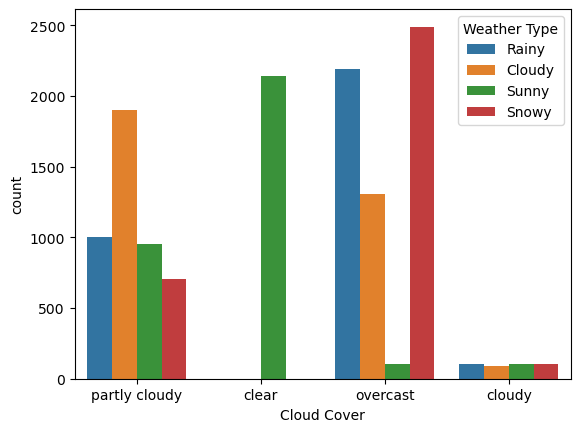

In [82]:
print(df['Cloud Cover'].value_counts())
sns.countplot(df, x = 'Cloud Cover', hue = 'Weather Type')

Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64


<Axes: xlabel='Season', ylabel='count'>

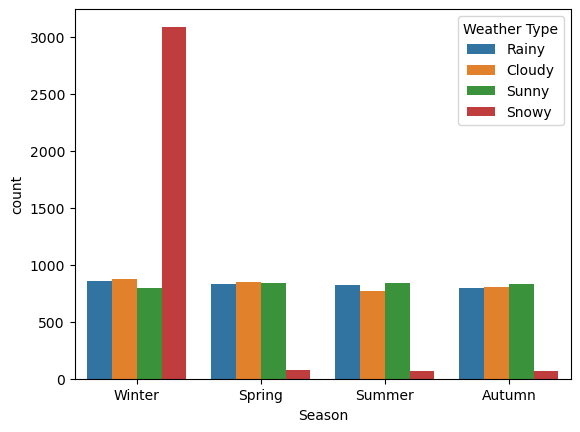

In [84]:
print(df['Season'].value_counts())
sns.countplot(df,x='Season',hue='Weather Type')

Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64


<Axes: xlabel='Location', ylabel='count'>

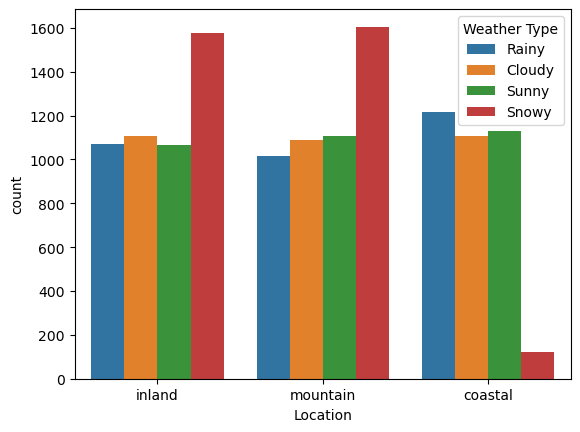

In [88]:
print(df['Location'].value_counts())
sns.countplot(df,x='Location',hue='Weather Type')

<Axes: xlabel='Weather Type', ylabel='count'>

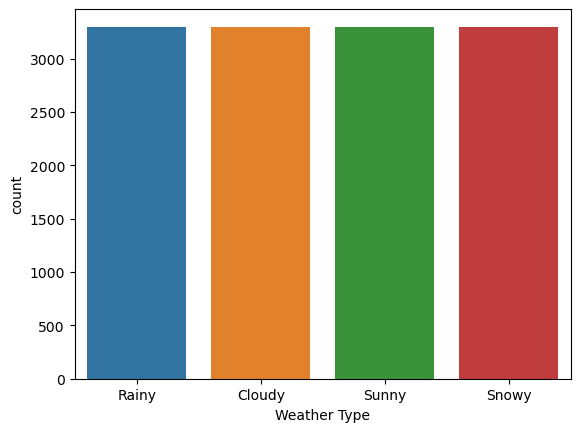

In [109]:
sns.countplot(df, x = 'Weather Type')

In [115]:
import warnings
warnings.filterwarnings('ignore')

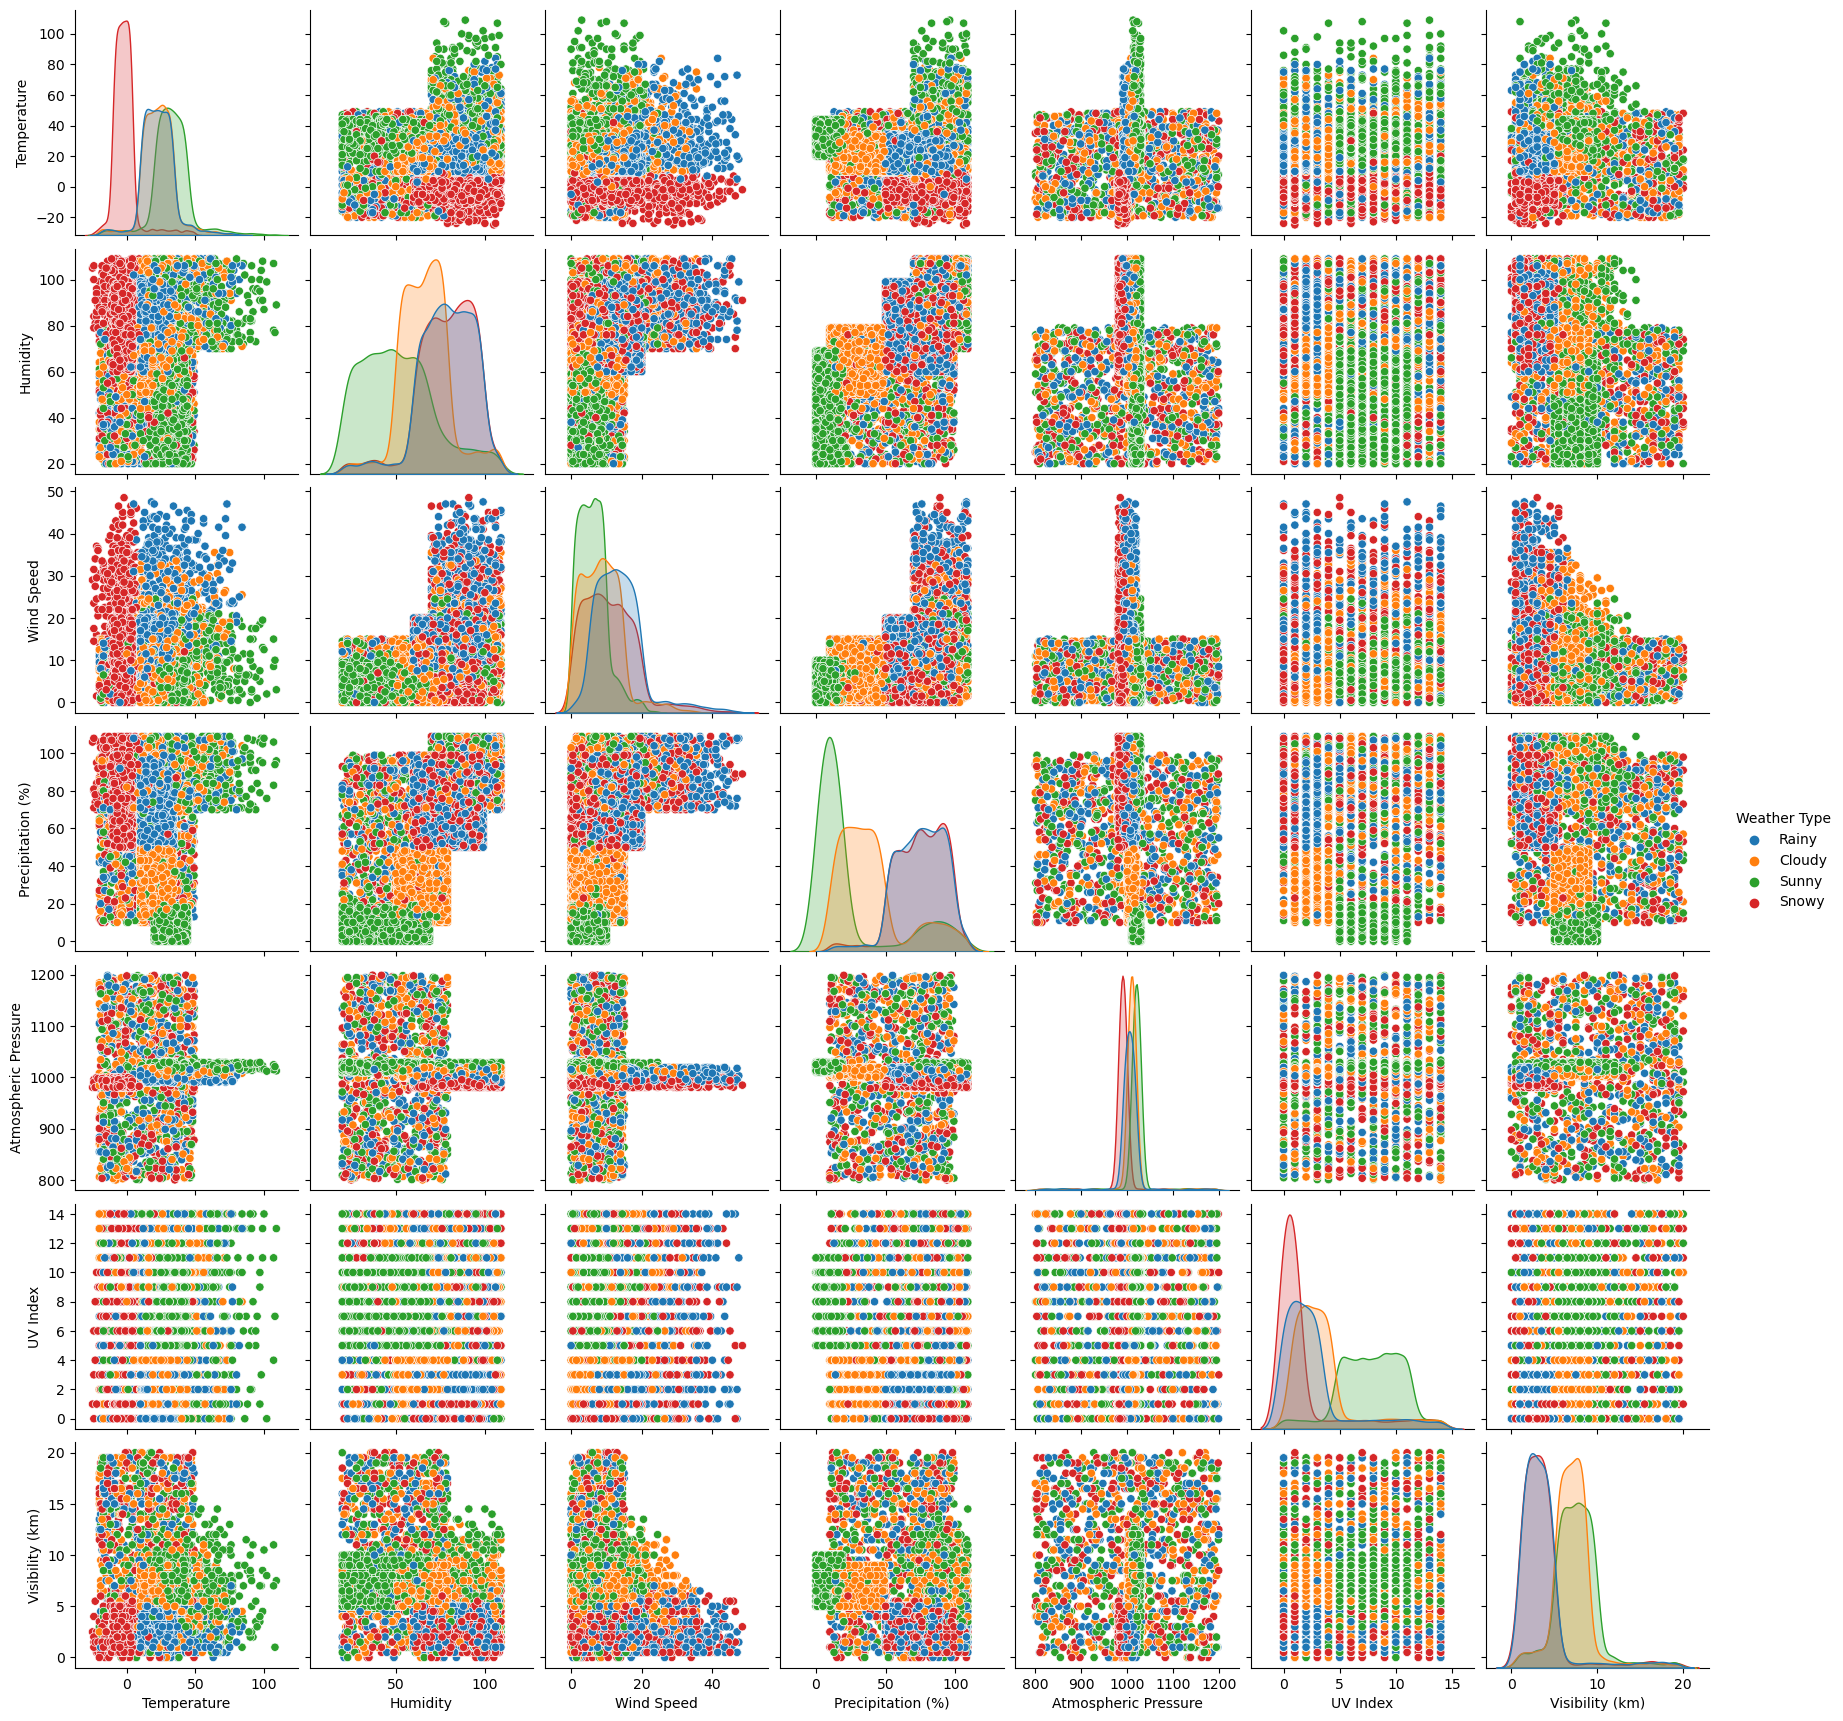

In [117]:
sns.pairplot(df, hue = 'Weather Type')

In [ ]:
# preprocessing

In [165]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
col=['Cloud Cover','Season','Location','Weather Type']
for i in col:
    df[i]=label.fit_transform(df[i])

In [167]:
x=df.drop('Weather Type',axis=1)
y=df['Weather Type']

In [201]:
# train test split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.8,random_state=42)
xtrain.shape,xtest.shape

((2640, 10), (10560, 10))

In [203]:
kfold=KFold(10,shuffle=True,random_state=42)

In [205]:
# model training and valuation

In [209]:
rf=RandomForestClassifier()
cv_rf=cross_val_score(rf,xtrain,ytrain,cv=kfold)
print('average cross validation:',cv_rf.mean())

average cross validation: 0.9143939393939393


In [225]:
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print('accuracy score:',accuracy_score(ytest,ypred_rf))

accuracy score: 0.9114583333333334


[[2384  122   73   70]
 [ 119 2373   77   64]
 [  50   60 2446   66]
 [  95   60   79 2422]]


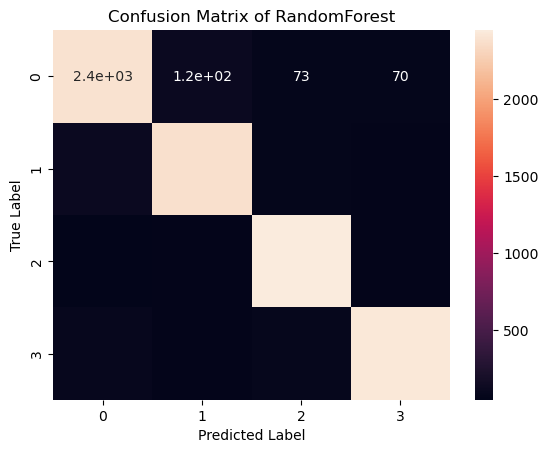

In [267]:
cm=confusion_matrix(ytest,ypred_rf)
print(cm)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of RandomForest')
plt.show()

In [251]:
lr=LogisticRegression()
cv_lr=cross_val_score(lr,xtrain,ytrain,cv=kfold)
print('average cross validation:',cv_lr.mean())

average cross validation: 0.8503787878787878


In [255]:
lr.fit(xtrain,ytrain)
ypred_lr=lr.predict(xtest)
print('accuracy score:',accuracy_score(ytest,ypred_lr))

accuracy score: 0.8460227272727273


[[2135  227  111  176]
 [ 127 2206  188  112]
 [  55   89 2365  113]
 [ 183  150   95 2228]]


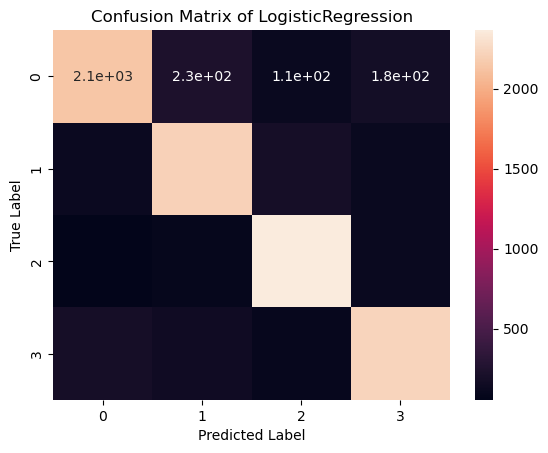

In [265]:
cm=confusion_matrix(ytest,ypred_lr)
print(cm)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of LogisticRegression')
plt.show()

In [261]:
xgb=XGBClassifier()
cv_xgb=cross_val_score(xgb,xtrain,ytrain,cv=kfold)
print('cross validation:',cv_xgb.mean())

cross validation: 0.9181818181818182


In [263]:
xgb.fit(xtrain,ytrain)
ypred_xgb=xgb.predict(xtest)
print('accuracy score:',accuracy_score(ytest,ypred_xgb))

accuracy score: 0.9142992424242424


[[2367  135   76   71]
 [ 108 2391   69   65]
 [  39   61 2462   60]
 [  94   58   69 2435]]


<function matplotlib.pyplot.show(close=None, block=None)>

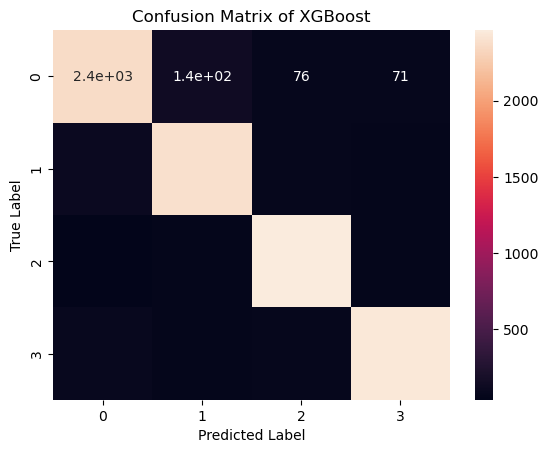

In [281]:
cm=confusion_matrix(ytest,ypred_xgb)
print(cm)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of XGBoost')
plt.show

In [273]:
sv=SVC()
cv_sv=cross_val_score(sv,xtrain,ytrain,cv=kfold)
print('cross vaildation:',cv_sv.mean())

cross vaildation: 0.7246212121212121


In [275]:
sv.fit(xtrain,ytrain)
ypred_sv=sv.predict(xtest)
print('accuracy score:',accuracy_score(ytest,ypred_sv))

accuracy score: 0.7422348484848484


[[1428  337  133  751]
 [ 185 1810  549   89]
 [  32   24 2482   84]
 [  25  396  117 2118]]


<function matplotlib.pyplot.show(close=None, block=None)>

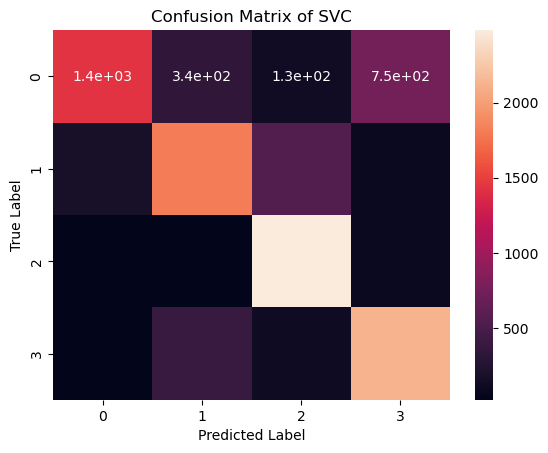

In [279]:
cm=confusion_matrix(ytest,ypred_sv)
print(cm)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of SVC')
plt.show

In [ ]:
# We should Select Random Forest as it is predicting all the classes with quite similar and better accuracy which we can see from the confusion matrix